In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression



#############################
# use this code for regularization
"""from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate
"""


'from sklearn.linear_model import Ridge\nfrom sklearn.pipeline import make_pipeline\nfrom sklearn.preprocessing import PolynomialFeatures\nfrom sklearn.model_selection import cross_validate\n'

In [3]:
dataset = pd.read_csv("housing.csv")

In [4]:
dataset = dataset.drop(["ocean_proximity"],axis=1)

question 1 

answer is : total_bedrooms has 207 missing value as code shown below

In [5]:
dataset.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [6]:
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


question 2 

In [7]:
dataset.population.quantile(0.5)

1166.0

question 3

In [8]:
#target = dataset["median_house_value"]
#dataset = dataset.drop(["median_house_value"],axis=1)

In [9]:
def train_validate_test_split(df, train_percent=.6, validate_percent=.2, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.iloc[perm[:train_end]]
    validate = df.iloc[perm[train_end:validate_end]]
    test = df.iloc[perm[validate_end:]]
    return train, validate, test

In [10]:
def split_targ(data1):

    y = data1["median_house_value"]
    x = data1.drop(["median_house_value"],axis=1)
    return x, y 

In [11]:
train, valid, test = train_validate_test_split(dataset, train_percent=.6, validate_percent=.2, seed=42)

In [12]:
x_train, y_train1 = split_targ(train)

x_val, y_val1 = split_targ(valid)

x_test, y_test1 = split_targ(test)

In [13]:
y_train = np.log1p(y_train1)
y_val = np.log1p(y_val1)
y_test = np.log1p(y_test1)


question 4

In [14]:
mean = x_train.total_bedrooms.mean()
filled_mean = x_train.fillna(mean)
filled_zero = x_train.fillna(0)

In [15]:
def calculate(x,y):

    model = LinearRegression()
    model.fit(x,y)
    lasso_train_2 = model.predict(x)
 
 #when use squared=false kwars , mse turn in to rmse, and took square root of result 
    return mean_squared_error(y, lasso_train_2,squared=False)

In [16]:
print(round(calculate(filled_mean,y_train),2))
print(round(calculate(filled_zero,y_train),2))

0.34
0.34


In [17]:
print(round(calculate(filled_mean,y_train),2))
print(round(calculate(filled_zero,y_train),2))

0.34
0.34


q4 (regularization)  

In [18]:
r_values = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

In [19]:
x_train = x_train.fillna(0)
x_val = x_val.fillna(0)
x_test = x_test.fillna(0)


In [20]:
from sklearn.linear_model import Ridge

In [21]:
def regularization_model(x,y):
    model = 

SyntaxError: invalid syntax (473057799.py, line 2)

In [22]:
ridge = make_pipeline(PolynomialFeatures(degree=2),Ridge(alpha=100))
cv_results = cross_validate(ridge, x_train, y_train,
                            cv=10, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True)

NameError: name 'make_pipeline' is not defined

In [23]:
train_error = -cv_results["test_score"]
print(f"Mean squared error of linear regression model on the train set:\n"
      f"{train_error.mean():.3f} ± {train_error.std():.3f}")

NameError: name 'cv_results' is not defined

In [24]:
x_train.iloc[8]

longitude             -122.0800
latitude                37.3900
housing_median_age       4.0000
total_rooms           2292.0000
total_bedrooms           0.0000
population            1050.0000
households             584.0000
median_income            4.8036
Name: 18246, dtype: float64

In [25]:

model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_train)



<AxesSubplot: xlabel='median_house_value', ylabel='Count'>

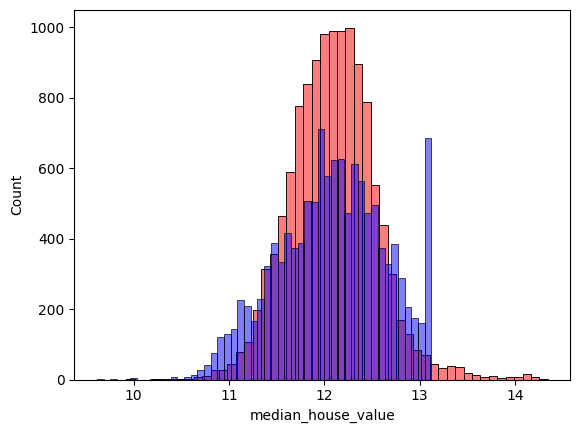

In [26]:
sns.histplot(y_pred, color="red", alpha=0.5, bins=50)
sns.histplot(y_train, color="blue", alpha=0.5, bins=50)